<a href="https://colab.research.google.com/github/afairley/ColaboratoryNotebooks/blob/main/Jax101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import jax
import jax.numpy as jnp

x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [5]:
long_vector = jnp.arange(int(1e7))
%timeit jnp.dot(long_vector, long_vector).block_until_ready()

8.65 ms ± 528 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
def sum_of_squares(x):
  return jnp.sum(x**2)
sum_of_squares_dx = jax.grad(sum_of_squares)
x = jnp.asarray([1.0, 2.0, 3.0, 4.0])
print(sum_of_squares(x))
print(sum_of_squares_dx(x))


30.0
[2. 4. 6. 8.]


In [7]:
def sum_squared_error(x, y):
  return jnp.sum((x-y)**2)

sum_squared_error_dx = jax.grad(sum_squared_error)
y = jnp.asarray([1.1, 2.1, 3.1, 4.1])
print(sum_squared_error_dx(x,y))

[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [8]:
jax.value_and_grad(sum_squared_error)(x, y)

(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [10]:
def squared_error_with_aux(x, y):
  return sum_squared_error(x, y), x-y

jax.grad(squared_error_with_aux, has_aux=True)(x,y)

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

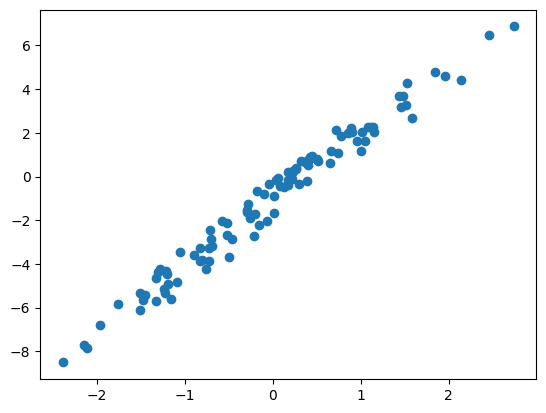

In [12]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = (xs * 3) - 1 +  5 * noise
plt.scatter(xs,ys)
